**México**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#cargar archivo .csv sin indice
data=pd.read_csv('México_sin_nulos.csv')

In [3]:
#verificamos la información del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   id                           26582 non-null  int64  
 2   listing_url                  26582 non-null  object 
 3   scrape_id                    26582 non-null  int64  
 4   last_scraped                 26582 non-null  object 
 5   source                       26582 non-null  object 
 6   name                         26582 non-null  object 
 7   neighborhood_overview        26582 non-null  object 
 8   picture_url                  26582 non-null  object 
 9   host_id                      26582 non-null  int64  
 10  host_url                     26582 non-null  object 
 11  host_name                    26582 non-null  object 
 12  host_since                   26582 non-null  object 
 13  host_location   

In [5]:
columnas_objeto = data.select_dtypes(include=['object']).columns

# Contar el número de columnas de tipo objeto
columnas_objeto = data.select_dtypes(include=['object']).columns
indices_columnas_objeto = [data.columns.get_loc(col) for col in columnas_objeto]

# Imprimir resultados
print(f"Número total de columnas con variables de tipo objeto: {len(columnas_objeto)}")
print(f"Números de columna: {indices_columnas_objeto}")

Número total de columnas con variables de tipo objeto: 30
Números de columna: [2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 34, 37, 38, 41, 42, 49]


In [6]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas = data.iloc[:, 1:50] 
cualitativas = data.iloc[:, [2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 34, 37, 38, 41, 42, 49]]

In [7]:
cuantitativas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           26582 non-null  int64  
 1   listing_url                  26582 non-null  object 
 2   scrape_id                    26582 non-null  int64  
 3   last_scraped                 26582 non-null  object 
 4   source                       26582 non-null  object 
 5   name                         26582 non-null  object 
 6   neighborhood_overview        26582 non-null  object 
 7   picture_url                  26582 non-null  object 
 8   host_id                      26582 non-null  int64  
 9   host_url                     26582 non-null  object 
 10  host_name                    26582 non-null  object 
 11  host_since                   26582 non-null  object 
 12  host_location                26582 non-null  object 
 13  host_about      

<Figure size 1500x800 with 0 Axes>

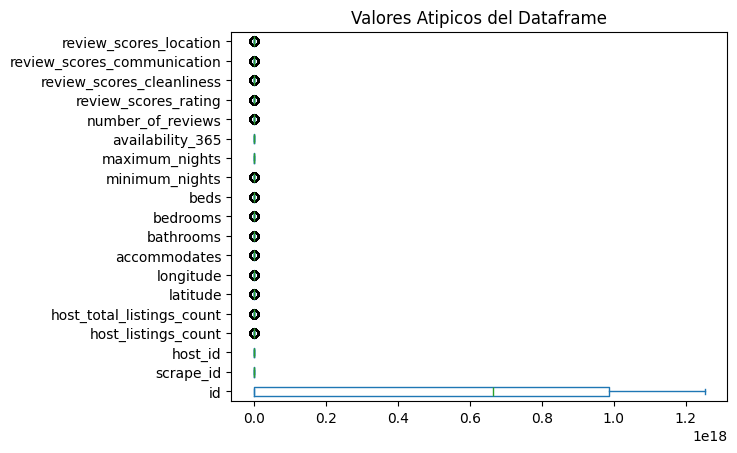

In [8]:
#realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8) )
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show()#dibujamos el diagrama

**Desviación estandar para eliminar outliers en el dataframe**

In [9]:
#Método aplicando desviación estandar. encuentra los valores extremos
cuantitativas = cuantitativas.select_dtypes(include=[np.number])
y = cuantitativas

Limite_Superior = y.mean() + 3 * y.std()
Limite_Inferior = y.mean() - 3 * y.std()

print("Límite superior permitido:", Limite_Superior)
print("Límite inferior permitido:", Limite_Inferior)

Límite superior permitido: id                             1.997574e+18
scrape_id                      2.024093e+13
host_id                        7.675833e+08
host_listings_count            3.295566e+02
host_total_listings_count      6.148874e+02
latitude                       1.953289e+01
longitude                     -9.906674e+01
accommodates                   1.043010e+01
bathrooms                      4.584733e+00
bedrooms                       5.339414e+00
beds                           6.956376e+00
minimum_nights                 8.183006e+01
maximum_nights                 1.793887e+03
availability_365               6.026093e+02
number_of_reviews              2.711536e+02
review_scores_rating           5.790227e+00
review_scores_cleanliness      5.799032e+00
review_scores_communication    5.823484e+00
review_scores_location         5.664577e+00
dtype: float64
Límite inferior permitido: id                            -9.359280e+17
scrape_id                      2.024093e+13
host_id

In [10]:
#Obtenemos datos y los outliers se convierten en nulos en el Dataframe
data2= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

id       scrape_id    host_id  host_listings_count  \
0                    35797  20240925021012     153786                  1.0   
1                    44616  20240925021012     196253                 12.0   
2                    67703  20240925021012     334451                  3.0   
3                    70644  20240925021012     212109                  3.0   
4                   107078  20240925021012     540705                  5.0   
...                    ...             ...        ...                  ...   
26577  1252141718111439700  20240925021012   67472234                167.0   
26578  1252159821531694005  20240925021012  596009321                 16.0   
26579  1252185591721328995  20240925021012  596009321                 16.0   
26580  1252218347521498445  20240925021012  596009321                 16.0   
26581  1252229157495978163  20240925021012    6522855                  4.0   

       host_total_listings_count   latitude  longitude  accommodates  \
0                            1.0  19.383820        NaN           2.0   
1                           13.0  19.411620 -99.177940           NaN   
2                            4.0  19.411520 -99.168570           4.0   
3                            4.0  19.356140 -99.163080           2.0   
4                            7.0  19.432110 -99.193270           2.0   
...                          ...        ...        ...           ...   
26577                      279.0  19.387329 -99.246731           4.0   
26578                       16.0  19.432687 -99.197736           2.0   
26579                       16.0  19.432687 -99.197736           2.0   
26580                       16.0  19.432687 -99.197736           2.0   
26581                        6.0  19.443476 -99.201748           2.0   

       bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0            1.0       1.0   1.0             1.0             7.0   
1            1.0       5.0   1.0             1.0           365.0   
2            1.0       2.0   2.0             2.0            30.0   
3            1.0       1.0   1.0             5.0           180.0   
4            1.5       1.0   1.0             1.0           365.0   
...          ...       ...   ...             ...             ...   
26577        1.0       2.0   2.0             1.0            45.0   
26578        1.0       1.0   1.0             1.0           365.0   
26579        1.0       1.0   1.0             1.0           365.0   
26580        1.0       1.0   1.0             1.0           365.0   
26581        1.0       1.0   1.0             1.0           365.0   

       availability_365  number_of_reviews  review_scores_rating  \
0                   363                0.0                  4.80   
1                   325               64.0                  4.58   
2                   325               49.0                  4.90   
3                   257              127.0                  4.91   
4                   275               11.0                  4.91   
...                 ...                ...                   ...   
26577               365                0.0                  4.80   
26578               177                0.0                  4.80   
26579               177                0.0                  4.80   
26580               177                0.0                  4.80   
26581               150                0.0                  4.80   

       review_scores_cleanliness  review_scores_communication  \
0                           4.90                         4.90   
1                           4.70                         4.78   
2                           4.75                         4.92   
3                           4.96                         4.98   
4                           5.00                         4.73   
...                          ...                          ...   
26577                       4.90                         4.90   
26578                       4.90                         4.90   
265

In [11]:
#Corroboramos  valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

id                               0
scrape_id                        0
host_id                          0
host_listings_count            304
host_total_listings_count      380
latitude                       357
longitude                      712
accommodates                   526
bathrooms                      309
bedrooms                       286
beds                           466
minimum_nights                 190
maximum_nights                   1
availability_365                 0
number_of_reviews              608
review_scores_rating           408
review_scores_cleanliness      437
review_scores_communication    435
review_scores_location         521
dtype: int64

In [12]:
#reemplazamos valores atipicos(nulos) del data frame con "mean"
#realizamos una copia del data frame
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

id       scrape_id    host_id  host_listings_count  \
0                    35797  20240925021012     153786                  1.0   
1                    44616  20240925021012     196253                 12.0   
2                    67703  20240925021012     334451                  3.0   
3                    70644  20240925021012     212109                  3.0   
4                   107078  20240925021012     540705                  5.0   
...                    ...             ...        ...                  ...   
26577  1252141718111439700  20240925021012   67472234                167.0   
26578  1252159821531694005  20240925021012  596009321                 16.0   
26579  1252185591721328995  20240925021012  596009321                 16.0   
26580  1252218347521498445  20240925021012  596009321                 16.0   
26581  1252229157495978163  20240925021012    6522855                  4.0   

       host_total_listings_count   latitude  longitude  accommodates  \
0                            1.0  19.383820 -99.200000           2.0   
1                           13.0  19.411620 -99.177940           3.1   
2                            4.0  19.411520 -99.168570           4.0   
3                            4.0  19.356140 -99.163080           2.0   
4                            7.0  19.432110 -99.193270           2.0   
...                          ...        ...        ...           ...   
26577                      279.0  19.387329 -99.246731           4.0   
26578                       16.0  19.432687 -99.197736           2.0   
26579                       16.0  19.432687 -99.197736           2.0   
26580                       16.0  19.432687 -99.197736           2.0   
26581                        6.0  19.443476 -99.201748           2.0   

       bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0            1.0       1.0   1.0             1.0             7.0   
1            1.0       5.0   1.0             1.0           365.0   
2            1.0       2.0   2.0             2.0            30.0   
3            1.0       1.0   1.0             5.0           180.0   
4            1.5       1.0   1.0             1.0           365.0   
...          ...       ...   ...             ...             ...   
26577        1.0       2.0   2.0             1.0            45.0   
26578        1.0       1.0   1.0             1.0           365.0   
26579        1.0       1.0   1.0             1.0           365.0   
26580        1.0       1.0   1.0             1.0           365.0   
26581        1.0       1.0   1.0             1.0           365.0   

       availability_365  number_of_reviews  review_scores_rating  \
0                   363                0.0                  4.80   
1                   325               64.0                  4.58   
2                   325               49.0                  4.90   
3                   257              127.0                  4.91   
4                   275               11.0                  4.91   
...                 ...                ...                   ...   
26577               365                0.0                  4.80   
26578               177                0.0                  4.80   
26579               177                0.0                  4.80   
26580               177                0.0                  4.80   
26581               150                0.0                  4.80   

       review_scores_cleanliness  review_scores_communication  \
0                           4.90                         4.90   
1                           4.70                         4.78   
2                           4.75                         4.92   
3                           4.96                         4.98   
4                           5.00                         4.73   
...                          ...                          ...   
26577                       4.90                         4.90   
26578                       4.90                         4.90   
265

In [13]:
#corroboramos valores nulos del data frame limpio
valores_nulos=data_clean.isnull().sum()
valores_nulos

id                             0
scrape_id                      0
host_id                        0
host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [14]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas
percentile25=y.quantile(0.25) #q1
percentile75=y.quantile(0.75) #q3
iqr= percentile75 - percentile25

Limite_Superior_iqr=percentile75 + 1.5*iqr
Limite_Inferior_iqr=percentile25 - 1.25*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                             2.467577e+18
scrape_id                      2.024093e+13
host_id                        8.612864e+08
host_listings_count            3.350000e+01
host_total_listings_count      3.950000e+01
latitude                       1.949409e+01
longitude                     -9.911773e+01
accommodates                   7.000000e+00
bathrooms                      3.500000e+00
bedrooms                       3.500000e+00
beds                           3.500000e+00
minimum_nights                 3.500000e+00
maximum_nights                 2.542500e+03
availability_365               7.105000e+02
number_of_reviews              1.355000e+02
review_scores_rating           5.255000e+00
review_scores_cleanliness      5.265000e+00
review_scores_communication    5.255000e+00
review_scores_location         5.255000e+00
dtype: float64
Limite inferior permitido id                            -1.233789e+18
scrape_id                      2.024093e+13
host_id  

In [15]:
#Obtenemos datos limpios del Dataframe
data2_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

id       scrape_id    host_id  host_listings_count  \
0                    35797  20240925021012     153786                  1.0   
1                    44616  20240925021012     196253                 12.0   
2                    67703  20240925021012     334451                  3.0   
3                    70644  20240925021012     212109                  3.0   
4                   107078  20240925021012     540705                  5.0   
...                    ...             ...        ...                  ...   
26577  1252141718111439700  20240925021012   67472234                  NaN   
26578  1252159821531694005  20240925021012  596009321                 16.0   
26579  1252185591721328995  20240925021012  596009321                 16.0   
26580  1252218347521498445  20240925021012  596009321                 16.0   
26581  1252229157495978163  20240925021012    6522855                  4.0   

       host_total_listings_count   latitude  longitude  accommodates  \
0                            1.0  19.383820        NaN           2.0   
1                           13.0  19.411620 -99.177940           NaN   
2                            4.0  19.411520 -99.168570           4.0   
3                            4.0  19.356140 -99.163080           2.0   
4                            7.0  19.432110 -99.193270           2.0   
...                          ...        ...        ...           ...   
26577                        NaN  19.387329        NaN           4.0   
26578                       16.0  19.432687 -99.197736           2.0   
26579                       16.0  19.432687 -99.197736           2.0   
26580                       16.0  19.432687 -99.197736           2.0   
26581                        6.0  19.443476 -99.201748           2.0   

       bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0            1.0       1.0   1.0             1.0               7   
1            1.0       NaN   1.0             1.0             365   
2            1.0       2.0   2.0             2.0              30   
3            1.0       1.0   1.0             NaN             180   
4            1.5       1.0   1.0             1.0             365   
...          ...       ...   ...             ...             ...   
26577        1.0       2.0   2.0             1.0              45   
26578        1.0       1.0   1.0             1.0             365   
26579        1.0       1.0   1.0             1.0             365   
26580        1.0       1.0   1.0             1.0             365   
26581        1.0       1.0   1.0             1.0             365   

       availability_365  number_of_reviews  review_scores_rating  \
0                   363                0.0                  4.80   
1                   325               64.0                  4.58   
2                   325               49.0                  4.90   
3                   257              127.0                  4.91   
4                   275               11.0                  4.91   
...                 ...                ...                   ...   
26577               365                0.0                  4.80   
26578               177                0.0                  4.80   
26579               177                0.0                  4.80   
26580               177                0.0                  4.80   
26581               150                0.0                  4.80   

       review_scores_cleanliness  review_scores_communication  \
0                           4.90                         4.90   
1                           4.70                         4.78   
2                           4.75                         4.92   
3                           4.96                         4.98   
4                           5.00                         4.73   
...                          ...                          ...   
26577                       4.90                         4.90   
26578                       4.90                         4.90   
265

In [16]:
#Corroboramos valores nulos
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

id                                0
scrape_id                         0
host_id                           0
host_listings_count            3567
host_total_listings_count      3764
latitude                       2155
longitude                      3157
accommodates                   1352
bathrooms                       644
bedrooms                        858
beds                           2447
minimum_nights                 3584
maximum_nights                    0
availability_365                  0
number_of_reviews              2328
review_scores_rating           2132
review_scores_cleanliness      2278
review_scores_communication    2355
review_scores_location         2177
dtype: int64

In [17]:
#Remplazamos valores atípicos (nulos) del data frame con "mean"
#Realizamos una copia del dataframe
data3_iqr=data2_iqr.copy()
data3_iqr=data3_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr

id       scrape_id    host_id  host_listings_count  \
0                    35797  20240925021012     153786                  1.0   
1                    44616  20240925021012     196253                 12.0   
2                    67703  20240925021012     334451                  3.0   
3                    70644  20240925021012     212109                  3.0   
4                   107078  20240925021012     540705                  5.0   
...                    ...             ...        ...                  ...   
26577  1252141718111439700  20240925021012   67472234                  6.2   
26578  1252159821531694005  20240925021012  596009321                 16.0   
26579  1252185591721328995  20240925021012  596009321                 16.0   
26580  1252218347521498445  20240925021012  596009321                 16.0   
26581  1252229157495978163  20240925021012    6522855                  4.0   

       host_total_listings_count   latitude  longitude  accommodates  \
0                            1.0  19.383820 -99.200000           2.0   
1                           13.0  19.411620 -99.177940           2.9   
2                            4.0  19.411520 -99.168570           4.0   
3                            4.0  19.356140 -99.163080           2.0   
4                            7.0  19.432110 -99.193270           2.0   
...                          ...        ...        ...           ...   
26577                        7.3  19.387329 -99.200000           4.0   
26578                       16.0  19.432687 -99.197736           2.0   
26579                       16.0  19.432687 -99.197736           2.0   
26580                       16.0  19.432687 -99.197736           2.0   
26581                        6.0  19.443476 -99.201748           2.0   

       bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0            1.0       1.0   1.0             1.0               7   
1            1.0       1.4   1.0             1.0             365   
2            1.0       2.0   2.0             2.0              30   
3            1.0       1.0   1.0             1.6             180   
4            1.5       1.0   1.0             1.0             365   
...          ...       ...   ...             ...             ...   
26577        1.0       2.0   2.0             1.0              45   
26578        1.0       1.0   1.0             1.0             365   
26579        1.0       1.0   1.0             1.0             365   
26580        1.0       1.0   1.0             1.0             365   
26581        1.0       1.0   1.0             1.0             365   

       availability_365  number_of_reviews  review_scores_rating  \
0                   363                0.0                  4.80   
1                   325               64.0                  4.58   
2                   325               49.0                  4.90   
3                   257              127.0                  4.91   
4                   275               11.0                  4.91   
...                 ...                ...                   ...   
26577               365                0.0                  4.80   
26578               177                0.0                  4.80   
26579               177                0.0                  4.80   
26580               177                0.0                  4.80   
26581               150                0.0                  4.80   

       review_scores_cleanliness  review_scores_communication  \
0                           4.90                         4.90   
1                           4.70                         4.78   
2                           4.75                         4.92   
3                           4.96                         4.98   
4                           5.00                         4.73   
...                          ...                          ...   
26577                       4.90                         4.90   
26578                       4.90                         4.90   
265

In [18]:
#datos limpios
datos_limpios = pd.concat([cualitativas, data3_iqr], axis=1)
datos_limpios

listing_url last_scraped  \
0                    https://www.airbnb.com/rooms/35797   2024-09-25   
1                    https://www.airbnb.com/rooms/44616   2024-09-26   
2                    https://www.airbnb.com/rooms/67703   2024-09-26   
3                    https://www.airbnb.com/rooms/70644   2024-09-25   
4                   https://www.airbnb.com/rooms/107078   2024-09-25   
...                                                 ...          ...   
26577  https://www.airbnb.com/rooms/1252141718111439700   2024-09-25   
26578  https://www.airbnb.com/rooms/1252159821531694005   2024-09-25   
26579  https://www.airbnb.com/rooms/1252185591721328995   2024-09-25   
26580  https://www.airbnb.com/rooms/1252218347521498445   2024-09-25   
26581  https://www.airbnb.com/rooms/1252229157495978163   2024-09-25   

                source                                              name  \
0          city scrape                                       Villa Dante   
1      previous scrape                                      Condesa Haus   
2          city scrape                 2 bedroom apt. deco bldg, Condesa   
3          city scrape  Beautiful light Studio Coyoacan- full equipped !   
4          city scrape                                NEW  DESIGNER LOFT   
...                ...                                               ...   
26577      city scrape    Charming 2-Bedroom Retreat in Lomas de Bezares   
26578      city scrape                     Suite King | District Polanco   
26579      city scrape                     Suite King | District Polanco   
26580      city scrape                    Suite Queen | District Polanco   
26581      city scrape                  Pretty, well centered, amenities   

                                   neighborhood_overview  \
0      Santa Fe Mall, Interloma Park and the Lion Des...   
1                          The neighborhood is very nice   
2                          The neighborhood is very nice   
3      Coyoacan is a beautiful neighborhood famous fo...   
4      Is located in the best area of Mexico City, Po...   
...                                                  ...   
26577  Welcome to Lomas de Bezares, a neighborhood kn...   
26578                      The neighborhood is very nice   
26579                      The neighborhood is very nice   
26580                      The neighborhood is very nice   
26581                      The neighborhood is very nice   

                                             picture_url  \
0      https://a0.muscache.com/pictures/f395ab78-1185...   
1      https://a0.muscache.com/pictures/251410/ec75fe...   
2      https://a0.muscache.com/pictures/3281720/6f078...   
3      https://a0.muscache.com/pictures/f397d2da-d045...   
4      https://a0.muscache.com/pictures/bd64f86d-4931...   
...                                                  ...   
26577  https://a0.muscache.com/pictures/prohost-api/H...   
26578  https://a0.muscache.com/pictures/miso/Hosting-...   
26579  https://a0.muscache.com/pictures/miso/Hosting-...   
26580  https://a0.muscache.com/pictures/miso/Hosting-...   
26581  https://a0.muscache.com/pictures/hosting/Hosti...   

                                          host_url   host_name  host_since  \
0         https://www.airbnb.com/users/show/153786        Dici  2010-06-28   
1         https://www.airbnb.com/users/show/196253    Fernando  2010-08-09   
2         https://www.airbnb.com/users/show/334451    Nicholas  2011-01-04   
3         https://www.airbnb.com/users/show/212109      Trisha  2010-08-24   
4         https://www.airbnb.com/users/show/540705      Andrea  2011-04-27   
...                                            ...         ...         ...   
26577   https://www.airbnb.com/users/show/67472234     HostPal  2016-04-16   
26578  https://www.airbnb.com/users/show/596009321  Luis Angel  2024-08-13   
26579  https://www.airbnb.com/users/show/596009321  Luis Angel  2024-08-13   
26580  https://www.airbnb.com/users/show/596

In [19]:
datos_limpios.to_csv("Datos_limpios_Mexico.csv")